In [15]:
import datetime, xarray as xa, numpy as np, pandas as pd
import matplotlib.pyplot as plt

<AxesSubplot:xlabel='TIMESTAMP'>

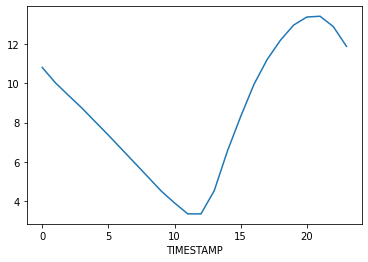

In [16]:
# Deal with Obs
lat=34.168
lon=77.458
start_date=datetime.datetime(year=2021,month=2,day=23)
stop_date=datetime.datetime(year=2020,month=12,day=20)
obs=pd.read_csv("Data/HIAL_1yr.csv",index_col=0,parse_dates=True)
obs.index=obs.index+datetime.timedelta(hours=5.5) # Shift to UTC
#obs=obs.loc[obs.index<stop_date]
t_hr=obs["AirTC_Avg"].groupby(obs.index.hour).mean()
t_hr.plot()


In [17]:
# Deal with ERA5
ERA5=xa.open_mfdataset('../ERA5/year-*.nc',combine='by_coords') #
ERA5_combine =ERA5.sel(expver=1).combine_first(ERA5.sel(expver=5))
ERA5_i=ERA5_combine["t2m"].sel(longitude=lon, latitude=lat, method="nearest")-273.15

In [18]:
ERA5_frame=ERA5_i.to_dataframe()
merged=pd.merge(obs,ERA5_frame, how='inner', left_index=True, right_index=True)
era_ann=ERA5_frame["t2m"].resample("Y").mean()
merged.tail(10)
temps=merged[["AirTC_Avg","t2m"]].dropna()
temps.columns=[["Obs","ERA"]]
thr=temps.resample("H").mean()
tday=temps.resample("D").mean()

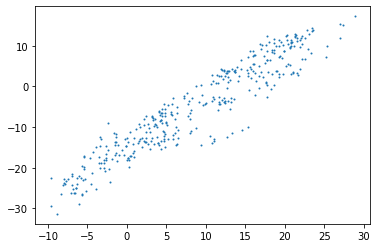

In [19]:
fig,ax=plt.subplots(1,1)
ax.scatter(tday["Obs"],tday["ERA"],s=1)


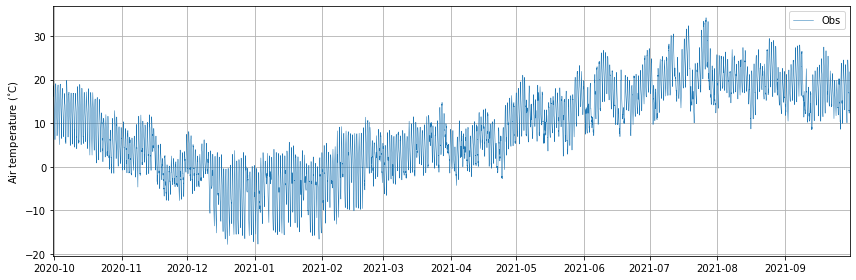

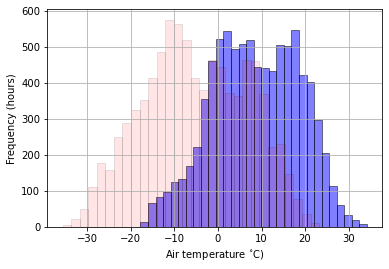

In [20]:
fig,ax=plt.subplots(1,1)
fig.set_size_inches(12,4)
ax.plot(thr.index,thr["Obs"],linewidth=0.5,label="Obs")
#ax.plot(thr.index,thr["ERA"],linewidth=0.5,label="Reanalysis",color='red')
ax.grid()
ax.set_ylabel("Air temperature ($^{\circ}$C)")
ax.set_xlim(thr.index[0],thr.index[-1])
ax.legend()
plt.tight_layout()
fig.savefig("../DemoTObsOnly.png",dpi=300)

fig,ax=plt.subplots(1,1)
ax.hist(thr["Obs"],bins=30,facecolor='blue',alpha=0.5,edgecolor='k')
ax.hist(thr["ERA"],bins=30,facecolor='red',alpha=0.1,edgecolor='k')
ax.grid()
ax.set_xlabel("Air temperature $^{\circ}$C)")
ax.set_ylabel("Frequency (hours)")
fig.savefig("../DemoTHist.png",dpi=300)

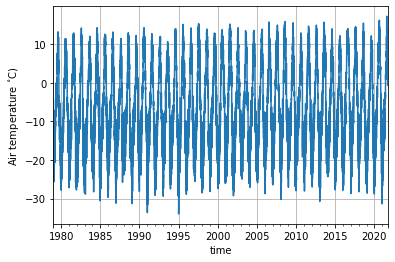

In [21]:
fig,ax=plt.subplots(1,1)
ERA5_frame["t2m"].resample("D").mean().plot(ax=ax)
ax.set_ylabel("Air temperature $^{\circ}$C)")
ax.grid()
fig.savefig("../DemoTFull.png",dpi=300)

In [22]:
# Read in orography 
zdata=xa.open_dataset("Data/elevation.nc")
z=zdata.z/9.80885
zi=z.sel(longitude=lon, latitude=lat, method="nearest")
zi

<xarray.DataArray 'z' (time: 1)>
array([4400.7773], dtype=float32)
Coordinates:
    longitude  float32 77.5
    latitude   float32 34.25
  * time       (time) datetime64[ns] 2020-01-01

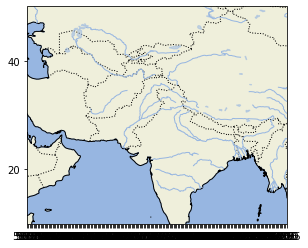

In [23]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import cartopy.feature as cfeature
fig = plt.figure()

ax = fig.add_subplot(1, 1, 1, projection=ccrs.PlateCarree())
ax.set_extent([57, 97, 10, 50], crs=ccrs.PlateCarree())
ax.add_feature(cfeature.LAND)
ax.add_feature(cfeature.OCEAN)
ax.add_feature(cfeature.COASTLINE)
ax.add_feature(cfeature.BORDERS, linestyle=':')
ax.add_feature(cfeature.LAKES, alpha=0.5)
ax.add_feature(cfeature.RIVERS)
xt=np.arange(50,98,0.25)
ax.set_xticks(xt, crs=ccrs.PlateCarree())
#ax.set_xticklabels([120., 140., 160., 180., -160., -140., -120.], color='red', weight='bold')
ax.set_yticks([20, 40], crs=ccrs.PlateCarree())
